# Interpolación polinómica de Newton

La interpolación polinómica de Newton es otra paroximación muy popula para ajustar de manera precisa un conjunto de puntos. La forma general de un polinomio de Newton de orden $n-1$ que pasa por los $n$ puntos es

$
f(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\cdots +a_n(x-x_0)(x-x_1)\cdots (x-x_n)
$

la cual se puede reescribir como:

$f(x)=\sum_{i=0}^{n} a_in_i(x)$

donde 
$n_i(x)=\prod_{j=0}^{i-1}(x-x_j)$

Una característica especial de los polinomios de newton es que los coeficientes $a_i$ pueden ser determinados de manera muy sencilla. Por ejemplo, dado que el polinomio pasa por todos los puntos se cumple:

$
f(x_i)=y_i
$

por lo que tenemos

$
f(x_0)=a_0=y_0
$

y 

$f(x_1)=a_0+a_1(x_1-x_0)=y_1$

Si lo rearreglamos obtenemos $a_1$

$
a_1=\frac{y_1-y_0}{x_1-x_0}
$



## Ejercicio

Interpole con el método de Newton los siguientes puntos $(-5,-2),(-1,6),(0,1),(2,3)$

In [1]:
import numpy as np

In [9]:
def divided_dif(x,y):
    n = len(y)
    coef = np.zeros([n,n])
    coef[:,0]=y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])
    return coef

In [10]:
x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])

In [11]:
coef = divided_dif(x,y)

In [12]:
coef

array([[-2.        ,  2.        , -1.4       ,  0.48571429],
       [ 6.        , -5.        ,  2.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        ,  0.        ],
       [ 3.        ,  0.        ,  0.        ,  0.        ]])

$
f(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\cdots +a_n(x-x_0)(x-x_1)\cdots (x-x_n)
$

In [17]:
def newton_pol(coef,x_data,x_new):
    y_f = np.ones(len(x_new)) 
    i = 0
    while i <= len(x_new)-1:
        y_f[i] = coef[0][0]+coef[0][1]*(x_new[i]-x_data[0])+coef[0][2]*(x_new[i]-x_data[0])*(x_new[i]-x_data[1])+\
        coef[0][3]*(x_new[i]-x_data[0])*(x_new[i]-x_data[1])*(x_new[i]-x_data[2])
        i += 1
    return y_f

In [23]:
x_new = np.arange(x[0],x[-1]+.1,.1)

In [28]:
np.arange?

In [24]:
y_i = newton_pol(coef,x,x_new)

In [2]:
import matplotlib.pyplot as plt

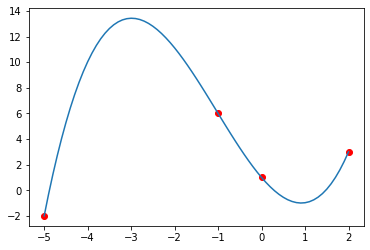

In [26]:
plt.plot(x,y,"ro")
plt.plot(x_new,y_i)

# Interpolación en 2D

De manera análoga a l caso en 1D, en la interpolación en 2D buscamos una función cuyos valores sean conocidos en un conjunto de puntos y que esto nos permita evaluar puntos intermedios en el dominio del rango de puntos.

Scipy nos provee de varias funciones y clases para interpolar en 2D, las mas comunes son *interpolate.interp2d* y *interpolate.griddata*. Siendo *interpolate.interp2d* la generalización de la función *interpolate.interp1d* que ya usamos anteriormente. Esta función toma las coordendas $x$ y $y$ de los puntos a interpolar como arreglos unidimensionales seguido de un arreglo 2-dimensional con los valores de Z evaluada en los puntos $(x,y)$.

## Ejemplo:

Simulemos un conjunto de datos con ruido considerando la función

$
f(x,y)=exp(-(x+1/2)^2-2(y+1/2)^2)-exp(-(x-1/2)^2-2(y-1/2)^2)
$

en el intervalo $[-2,2]$ con 10 puntos

In [29]:
def f(x,y):
    return np.exp(-(x+1/2)**2-2*(y+1/2)**2) - np.exp(-(x-1/2)**2-2*(y-1/2)**2)

In [30]:
x = y =np.linspace(-2,2,10)

Simulamos los puntos con ruido

In [31]:
X,Y = np.meshgrid(x,y)
Z = f(X,Y)+0.05*np.random.rand(10,10)

Entonces, ya tenemos nuesttro conjunto de puntos con ruido. Para obtener la función interpoladora podemos usar la función *interpolation.interp2d*

In [3]:
from scipy import interpolate

In [36]:
f_i = interpolate.interp2d(x,y,Z, kind = "cubic")

In [35]:
interpolate.interp2d?

In [53]:
xx = yy =np.linspace(-2,2,100)
XX,YY = np.meshgrid(xx,yy)
ZZi = f_i(xx,yy)

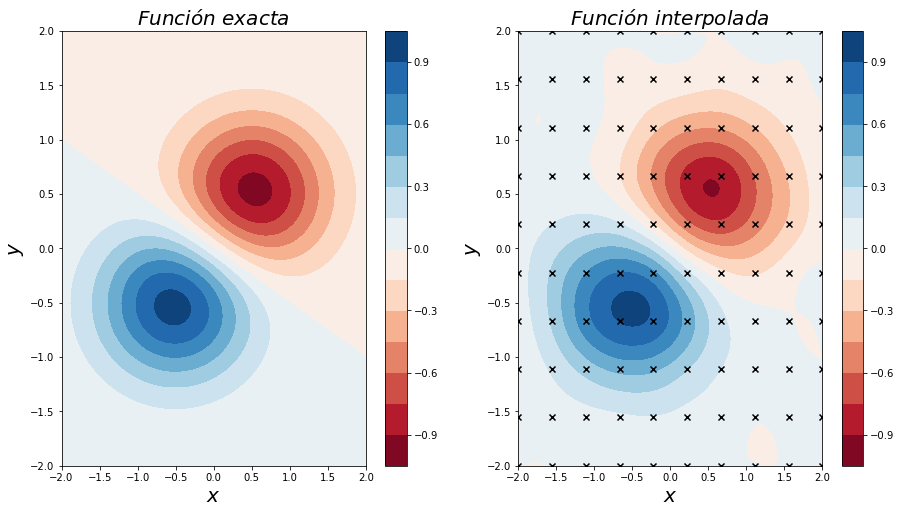

In [75]:
fig,axes = plt.subplots(1,2,figsize=(15,8))
c = axes[0].contourf(XX,YY,f(XX,YY), 15,cmap = "RdBu")
axes[0].set_xlabel("$x$", fontsize = 20)
axes[0].set_ylabel("$y$", fontsize = 20)
axes[0].set_title("$Función$ $exacta$", fontsize = 20)
cb = fig.colorbar(c,ax=axes[0])

c = axes[1].contourf(XX,YY,ZZi, 15,cmap = "RdBu")
axes[1].set_xlabel("$x$", fontsize = 20)
axes[1].set_ylabel("$y$", fontsize = 20)
axes[1].set_title("$Función$ $interpolada$", fontsize = 20)
cb = fig.colorbar(c,ax=axes[1])

axes[1].scatter(X,Y, marker = "x", color = "k")

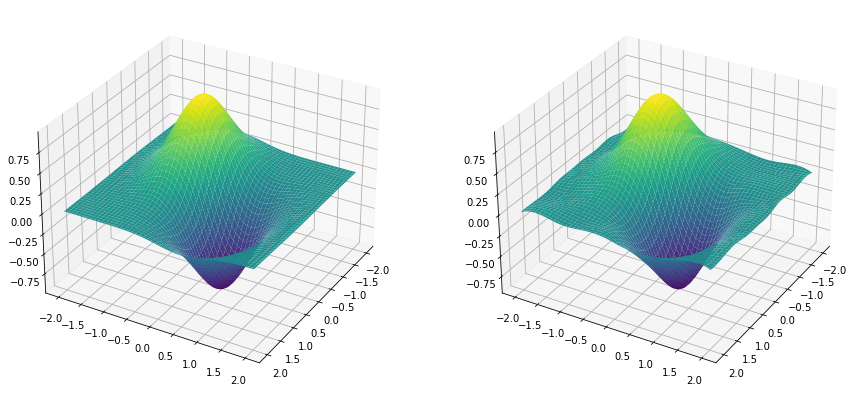

In [65]:
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(121, projection = "3d")
ax.plot_surface(XX,YY,f(XX,YY), cmap = "viridis")
ax.view_init(30,30)

ax = fig.add_subplot(122, projection = "3d")
ax.plot_surface(XX,YY,ZZi, cmap = "viridis")
ax.view_init(30,30)

Una situación muy común a la que podemos enfrentarnos ocurre cuando los datos a interpolar estan dados en un arreglo irregular. Esta situación se presenta frecuentemente cuando se realizan mediciones experimentales. Para tal aso podemos usar la función *interpolate.griddata*

In [25]:
def f(x,y):
    return np.exp(-x**2-y**2)*np.cos(4*x)*np.sin(6*y)

Construimos los puntos que queremos interpolar, $(x,y,z)=(xdata,ydata,zdata)$

In [26]:
N = 500
xdata = np.random.uniform(-1,1,N)
ydata = np.random.uniform(-1,1,N)
zdata = f(xdata,ydata)

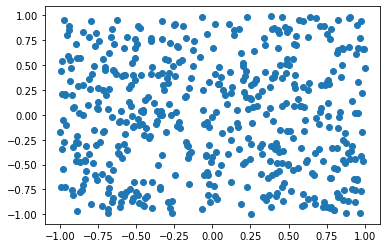

In [27]:
plt.scatter(xdata,ydata)

In [28]:
x = y =np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)

In [49]:
Zi = interpolate.griddata((xdata,ydata),zdata,(X,Y),method = "cubic")

In [30]:
Z = f(X,Y)

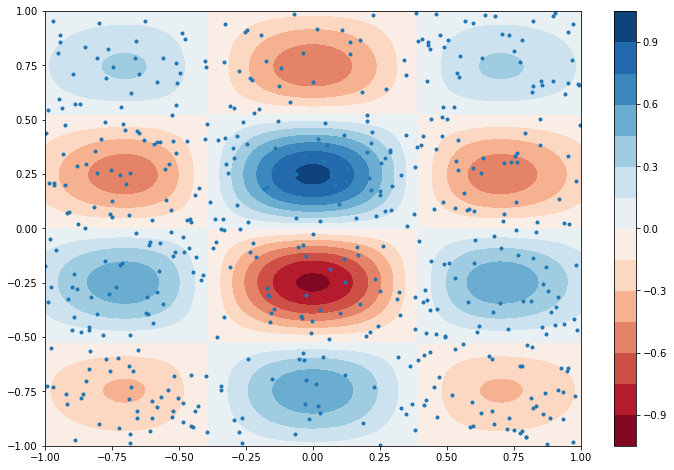

In [31]:
fig, ax = plt.subplots(figsize= (12,8))
c = ax.contourf(X,Y,Z,15,cmap="RdBu")
ax.scatter(xdata,ydata,marker=".")
cb = fig.colorbar(c)

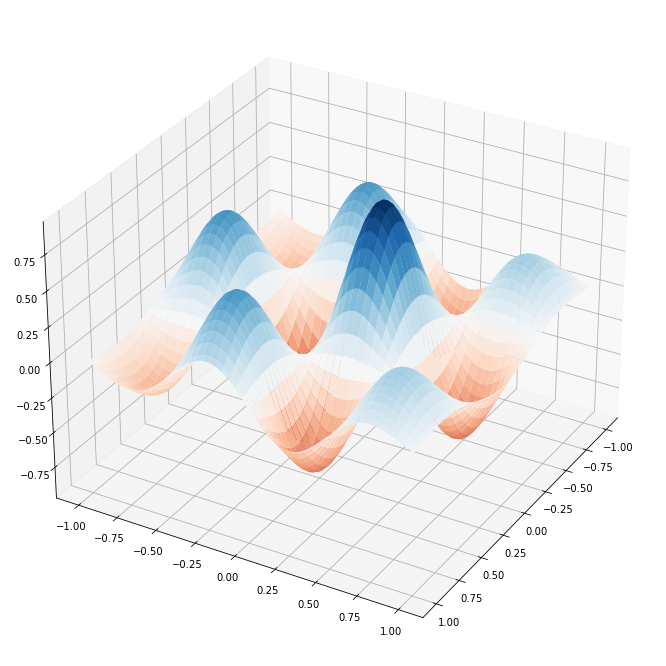

In [35]:
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X,Y,Z,cmap = "RdBu")
ax.view_init(30,30)

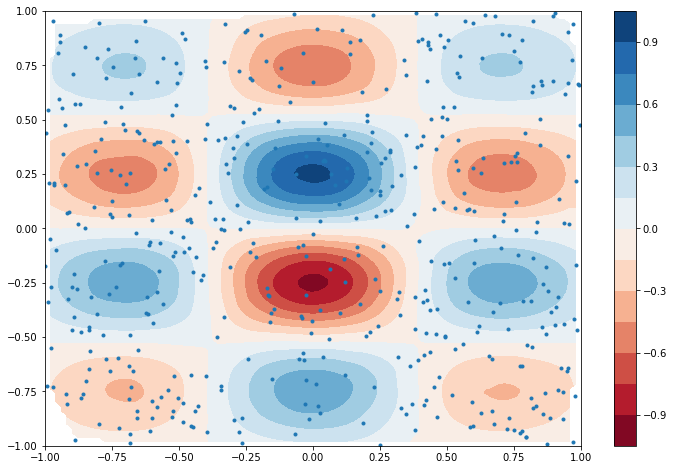

In [50]:
fig, ax = plt.subplots(figsize= (12,8))
c = ax.contourf(X,Y,Zi,15,cmap="RdBu")
ax.scatter(xdata,ydata,marker=".")
cb = fig.colorbar(c)

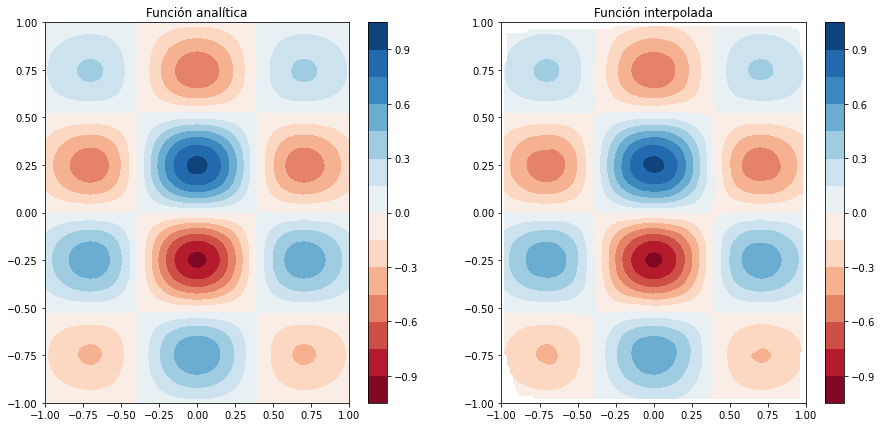

In [42]:
fig, axes  = plt.subplots (1,2,figsize = (15,7))
c = axes[0].contourf(X,Y,Z,15,cmap="RdBu")
axes[0].set_title("Función analítica")
cb = fig.colorbar(c, ax =axes[0])

c =  axes[1].contourf(X,Y,Zi,15,cmap="RdBu")
axes[1].set_title("Función interpolada")
cb = fig.colorbar(c, ax =axes[1])